In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree


In [2]:
sheet_id="1fub7yrKH03vUsHioXc04dhIYb86s6lyXIwhewMLsV9U"
sheet_name="Dataset"

df = pd.read_csv("https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name))

# Original Dataset

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df.shape

(395, 33)

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [10]:
edf=df

In [11]:
d = {'U': 0, 'R': 1}
edf['address'] = edf['address'].map(d)

In [12]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
d = {'F': 0, 'M': 1}

edf['sex'] = edf['sex'].map(d)



d = {'GT3': 0, 'LE3': 1}

edf['famsize'] = edf['famsize'].map(d)


d = {'A': 0, 'T': 1}

edf['Pstatus'] = edf['Pstatus'].map(d)


d = {'at_home' : 0, 'health' :1, 'other' :2, 'services' :3, 'teacher':4}

edf['Mjob'] = edf['Mjob'].map(d)



d = {'teacher' : 0, 'other' : 1, 'services' : 2, 'health' : 3, 'at_home' : 4}

edf['Fjob'] = edf['Fjob'].map(d)



d = {'mother' : 0, 'father' : 1, 'other': 2}

edf['guardian'] = edf['guardian'].map(d)

In [14]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int64 
 9   Fjob        395 non-null    int64 
 10  reason      395 non-null    object
 11  guardian    395 non-null    int64 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
edf.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [16]:
edf.school.unique()

array(['GP', 'MS'], dtype=object)

In [17]:
d = {'GP': 0, 'MS': 1}

edf['school'] = edf['school'].map(d)

In [18]:
d = {'course':0, 'other':1, 'home':2, 'reputation':3}

edf['reason'] = edf['reason'].map(d)

In [19]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int64 
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int64 
 9   Fjob        395 non-null    int64 
 10  reason      395 non-null    int64 
 11  guardian    395 non-null    int64 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [20]:
d = {'no' : 0, 'yes' : 1}

edf['schoolsup'] = df['schoolsup'].map(d)
edf['famsup'] = df['famsup'].map(d)
edf['paid'] = df['paid'].map(d)
edf['activities'] = df['activities'].map(d)
edf['nursery'] = df['nursery'].map(d)
edf['higher'] = df['higher'].map(d)
edf['internet'] = df['internet'].map(d)
edf['romantic'] = df['romantic'].map(d)


In [21]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

# Lasso, Linear and Ridge Regression

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.073473,-0.130047,0.075705,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,-0.098553,-0.079885,-0.015285,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,0.051596,-0.014763,0.269479,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,0.279797,0.028504,0.146722,1.000000,-0.072472,0.042572,-0.138804,-0.072178,-0.108818,-0.045578,-0.018625,-0.070318,0.328096,0.020912,0.078578,-0.024712,-0.023903,-0.052800,0.051360,-0.059589,-0.042854,-0.216842,-0.005257,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.069704,-0.126037,-0.105756
famsize,0.064866,0.089862,0.037847,-0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,0.066836,-0.014619,-0.030443,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.013789,-0.019839,0.026053,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,-0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,-0.107865,0.110357,-0.133291,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,-0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,-0.041505,0.042157,-0.004840,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,-0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,-0.056233,0.042798,-0.075506,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.073473,-0.098553,0.051596,-0.045578,0.066836,0.013789,-0.107865,-0.041505,-0.056233,1.000000,0.026856,0.097343,-0.121741,0.100940,0.071041,0.017146,0.005538,0.031086,0.036609,0.074115,-0.025829,0.051496,0.045406,0.002908,-0.002596,-0.041972,0.023638,-0.050560,-0.001413,-0.010758,0.000192,-0.000818,-0.019246


In [23]:
mrdf=edf

In [24]:
from sklearn.model_selection import train_test_split
#df_x=mrdf.drop('GMean',axis=1)
#df_y=mrdf['GMean']
df_x=mrdf.drop('G3',axis=1)
df_y=mrdf['G3']
print(df_x)
print(df_y)
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y,test_size=0.2, random_state=2)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        0        0        0     4     4     0     0  ...   
1         0    0   17        0        0        1     1     1     0     1  ...   
2         0    0   15        0        1        1     1     1     0     1  ...   
3         0    0   15        0        0        1     4     2     1     2  ...   
4         0    0   16        0        0        1     3     3     2     1  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        0        1        0     2     2     3     2  ...   
391       1    1   17        0        1        1     3     1     3     2  ...   
392       1    1   21        1        0        1     1     1     2     1  ...   
393       1    1   18        1        1        1     3     2     3     1  ...   
394       1    1   19        0        1        1     1     1     2     4  ...   

     romantic  famrel  free

In [25]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train,y_train)
reg.score(x_train,y_train)

0.8400584918594939

In [26]:
#Lasso Regression
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.2, max_iter=200, tol=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.2, max_iter=200, tol=0.001)

In [27]:
#model accuracy on testing dataset
lasso_reg.score(x_test,y_test)

0.8522387384501344

In [28]:
#model accuracy on training dataset
lasso_reg.score(x_train,y_train)

0.8243065090427111

In [29]:
#predicting testing dataset
y_predict=lasso_reg.predict(x_test)
#printing x_test values
print("printing x_test values")
print(x_test)
#printing y_test values
print("Expected result")
print(y_test)
#printing corresponding predicted grades
print("Predicted Result")
print(y_predict)


printing x_test values
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
94        0    1   15        0        1        1     2     2     3     3  ...   
32        0    1   15        1        0        1     4     3     4     4  ...   
222       0    0   16        0        0        1     2     3     3     0  ...   
329       0    0   17        0        0        1     4     4     4     0  ...   
369       1    0   18        1        0        1     4     4     2     0  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
182       0    0   17        0        0        1     2     4     3     2  ...   
186       0    1   16        0        0        1     1     2     3     2  ...   
220       0    0   17        1        0        1     2     1     0     2  ...   
65        0    0   16        0        1        1     4     3     4     2  ...   
372       1    0   17        0        0        1     2     2     2     4  ...   

    

In [30]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=100, max_iter=250, tol=0.2)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=100, max_iter=250, tol=0.2)

In [31]:
# model accuracy on test dataset
ridge_reg.score(x_test,y_test)

0.8467113718247544

In [32]:
#model accuracy on training dataset
ridge_reg.score(x_train,y_train)

0.8353140558253529

In [33]:
#predicting testing dataset
y_predict1=ridge_reg.predict(x_test)
#printing x_test values
print("printing x_test values")
print(x_test)
#printing y_test values
print("Expected result")
print(y_test)
#printing corresponding predicted grades
print("Predicted Result")
print(y_predict1)


printing x_test values
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
94        0    1   15        0        1        1     2     2     3     3  ...   
32        0    1   15        1        0        1     4     3     4     4  ...   
222       0    0   16        0        0        1     2     3     3     0  ...   
329       0    0   17        0        0        1     4     4     4     0  ...   
369       1    0   18        1        0        1     4     4     2     0  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
182       0    0   17        0        0        1     2     4     3     2  ...   
186       0    1   16        0        0        1     1     2     3     2  ...   
220       0    0   17        1        0        1     2     1     0     2  ...   
65        0    0   16        0        1        1     4     3     4     2  ...   
372       1    0   17        0        0        1     2     2     2     4  ...   

    

# Decision Tree Classifier

In [34]:
hk=df.drop(['age', 'reason', 'school'], axis = 1)

In [35]:
def make_grade(df):
    
    Final = []

  
    for row in df['GMean']:
    
        if row >= (0.9 * df['GMean'].max()):
            
            Final.append('A')
        
        elif row >= (0.7 * df['GMean'].max()):
         
            Final.append('B')
       
        elif row < (0.7 * df['GMean'].max()):
       
            Final.append('C')   
    
    df['Grade'] = Final
    return df

In [36]:
hk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   address     395 non-null    int64
 2   famsize     395 non-null    int64
 3   Pstatus     395 non-null    int64
 4   Medu        395 non-null    int64
 5   Fedu        395 non-null    int64
 6   Mjob        395 non-null    int64
 7   Fjob        395 non-null    int64
 8   guardian    395 non-null    int64
 9   traveltime  395 non-null    int64
 10  studytime   395 non-null    int64
 11  failures    395 non-null    int64
 12  schoolsup   395 non-null    int64
 13  famsup      395 non-null    int64
 14  paid        395 non-null    int64
 15  activities  395 non-null    int64
 16  nursery     395 non-null    int64
 17  higher      395 non-null    int64
 18  internet    395 non-null    int64
 19  romantic    395 non-null    int64
 20  famrel      395 non-null    int6

In [37]:
hk['GMean'] = (hk['G1'] + hk['G2'] + hk['G3']) / 3




In [38]:
hk.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GMean
0,0,0,0,0,4,4,0,0,0,2,...,3,4,1,1,3,6,5,6,6,5.666667
1,0,0,0,1,1,1,0,1,1,1,...,3,3,1,1,3,4,5,5,6,5.333333
2,0,0,1,1,1,1,0,1,0,1,...,3,2,2,3,3,10,7,8,10,8.333333
3,0,0,0,1,4,2,1,2,0,1,...,2,2,1,1,5,2,15,14,15,14.666667
4,0,0,0,1,3,3,2,1,1,1,...,3,2,1,2,5,4,6,10,10,8.666667


In [39]:
hk['GMean']=round(hk['GMean'])
hk['GMean']=hk['GMean'].astype(np.int64)

In [40]:
hk = make_grade(hk)
hk.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GMean,Grade
0,0,0,0,0,4,4,0,0,0,2,...,4,1,1,3,6,5,6,6,6,C
1,0,0,0,1,1,1,0,1,1,1,...,3,1,1,3,4,5,5,6,5,C
2,0,0,1,1,1,1,0,1,0,1,...,2,2,3,3,10,7,8,10,8,C
3,0,0,0,1,4,2,1,2,0,1,...,2,1,1,5,2,15,14,15,15,B
4,0,0,0,1,3,3,2,1,1,1,...,2,1,2,5,4,6,10,10,9,C


In [41]:
n = {'C' :0, 'B':1, 'A':2}

hk['Grade'] = hk['Grade'].map(n)


hk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   address     395 non-null    int64
 2   famsize     395 non-null    int64
 3   Pstatus     395 non-null    int64
 4   Medu        395 non-null    int64
 5   Fedu        395 non-null    int64
 6   Mjob        395 non-null    int64
 7   Fjob        395 non-null    int64
 8   guardian    395 non-null    int64
 9   traveltime  395 non-null    int64
 10  studytime   395 non-null    int64
 11  failures    395 non-null    int64
 12  schoolsup   395 non-null    int64
 13  famsup      395 non-null    int64
 14  paid        395 non-null    int64
 15  activities  395 non-null    int64
 16  nursery     395 non-null    int64
 17  higher      395 non-null    int64
 18  internet    395 non-null    int64
 19  romantic    395 non-null    int64
 20  famrel      395 non-null    int6

In [42]:
y=hk[['Grade']].copy()
hk.drop(['G1', 'G2','G3','GMean','Grade'], axis=1, inplace=True)

In [43]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Grade   395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [44]:
y

,Grade
0,0
1,0
2,0
3,1
4,0
...,...
390,0
391,1
392,0
393,0


In [45]:
hk

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,0,0,4,4,0,0,0,2,...,1,0,0,4,3,4,1,1,3,6
1,0,0,0,1,1,1,0,1,1,1,...,1,1,0,5,3,3,1,1,3,4
2,0,0,1,1,1,1,0,1,0,1,...,1,1,0,4,3,2,2,3,3,10
3,0,0,0,1,4,2,1,2,0,1,...,1,1,1,3,2,2,1,1,5,2
4,0,0,0,1,3,3,2,1,1,1,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,1,0,2,2,3,2,2,1,...,1,0,0,5,5,4,4,5,4,11
391,1,0,1,1,3,1,3,2,0,2,...,1,1,0,2,4,5,3,4,2,3
392,1,1,0,1,1,1,2,1,2,1,...,1,0,0,5,5,3,3,3,3,3
393,1,1,1,1,3,2,3,1,0,3,...,1,1,0,4,4,1,3,4,5,0


In [46]:
X=hk

In [47]:
X

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,0,0,4,4,0,0,0,2,...,1,0,0,4,3,4,1,1,3,6
1,0,0,0,1,1,1,0,1,1,1,...,1,1,0,5,3,3,1,1,3,4
2,0,0,1,1,1,1,0,1,0,1,...,1,1,0,4,3,2,2,3,3,10
3,0,0,0,1,4,2,1,2,0,1,...,1,1,1,3,2,2,1,1,5,2
4,0,0,0,1,3,3,2,1,1,1,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,1,0,2,2,3,2,2,1,...,1,0,0,5,5,4,4,5,4,11
391,1,0,1,1,3,1,3,2,0,2,...,1,1,0,2,4,5,3,4,2,3
392,1,1,0,1,1,1,2,1,2,1,...,1,0,0,5,5,3,3,3,3,3
393,1,1,1,1,3,2,3,1,0,3,...,1,1,0,4,4,1,3,4,5,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=79)

In [52]:
grade_classifier = tree.DecisionTreeClassifier()

In [53]:
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:

y_predict = grade_classifier.predict(X_test)

In [55]:
accuracy_score(y_true = y_test, y_pred = y_predict)

0.6962025316455697

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
print(confusion_matrix(y_test,y_predict))

[[51 12  2]
 [ 6  4  0]
 [ 1  3  0]]


In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        65
           1       0.21      0.40      0.28        10
           2       0.00      0.00      0.00         4

    accuracy                           0.70        79
   macro avg       0.36      0.39      0.37        79
weighted avg       0.75      0.70      0.72        79



# Random Forest

## Regression

In [59]:
mudf=df

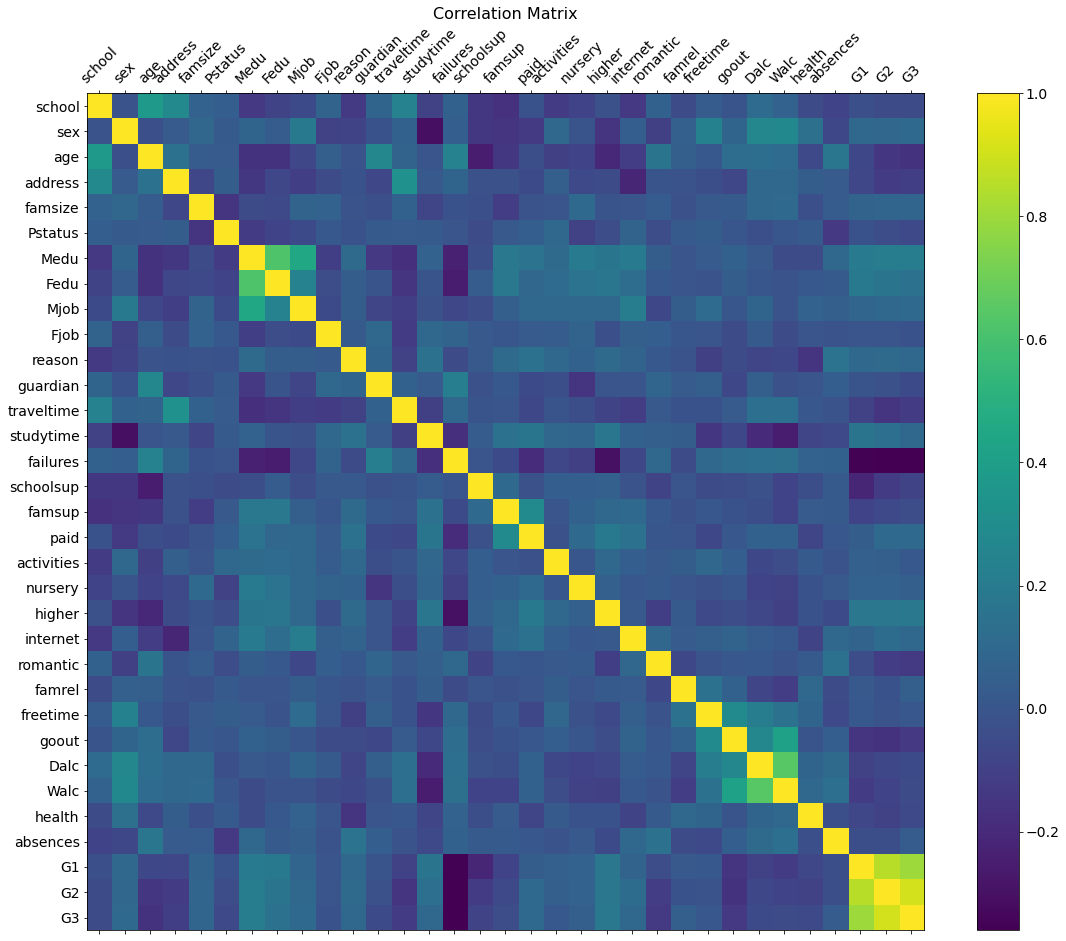

In [60]:
fg = plt.figure(figsize=(19, 15))
plt.matshow(mudf.corr(), fignum=fg.number)
plt.xticks(range(mudf.select_dtypes(['number']).shape[1]), mudf.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(mudf.select_dtypes(['number']).shape[1]), mudf.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [61]:
corr = mudf.corr()
corr.style.background_gradient(cmap='coolwarm')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.073473,-0.130047,0.075705,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,-0.098553,-0.079885,-0.015285,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,0.051596,-0.014763,0.269479,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,0.279797,0.028504,0.146722,1.000000,-0.072472,0.042572,-0.138804,-0.072178,-0.108818,-0.045578,-0.018625,-0.070318,0.328096,0.020912,0.078578,-0.024712,-0.023903,-0.052800,0.051360,-0.059589,-0.042854,-0.216842,-0.005257,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.069704,-0.126037,-0.105756
famsize,0.064866,0.089862,0.037847,-0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,0.066836,-0.014619,-0.030443,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.013789,-0.019839,0.026053,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,-0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,-0.107865,0.110357,-0.133291,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,-0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,-0.041505,0.042157,-0.004840,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,-0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,-0.056233,0.042798,-0.075506,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.073473,-0.098553,0.051596,-0.045578,0.066836,0.013789,-0.107865,-0.041505,-0.056233,1.000000,0.026856,0.097343,-0.121741,0.100940,0.071041,0.017146,0.005538,0.031086,0.036609,0.074115,-0.025829,0.051496,0.045406,0.002908,-0.002596,-0.041972,0.023638,-0.050560,-0.001413,-0.010758,0.000192,-0.000818,-0.019246


In [62]:
mudf.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
address      -0.105756
schoolsup    -0.082788
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
guardian     -0.054193
Walc         -0.051939
school       -0.045017
famsup       -0.039157
Fjob         -0.019246
freetime      0.011307
activities    0.016100
absences      0.034247
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
reason        0.099773
paid          0.101996
Mjob          0.102082
sex           0.103456
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [63]:
y=mudf['G3']
X =mudf.drop(['G3'], axis='columns')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [65]:
train = RandomForestRegressor(n_estimators=10, random_state=0)
train.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [66]:
y_pred = train.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8700735974403124


## Classifier

In [68]:
Grade_Mean = mudf[['G1', 'G2','G3']].mean(axis=1)
Grade_Mean=round(Grade_Mean)
mudf_Mean=Grade_Mean.astype(np.int64)

In [69]:
y_mean=mudf_Mean
X_mean =mudf

In [70]:
X_mean_train, X_mean_test, y_mean_train, y_mean_test = train_test_split(X_mean, y_mean, test_size=0.3,random_state=42)

In [71]:
train_mean = RandomForestClassifier(n_estimators=10, random_state=0)
train_mean.fit(X_mean_train, y_mean_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [72]:
y_mean_pred = train_mean.predict(X_mean_test)

In [73]:
from sklearn.metrics import r2_score
print(r2_score(y_mean_test, y_mean_pred))

0.8570269216470354
